In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import statsmodels.api as sm
import shap

In [3]:
full_games_dataset = pd.read_csv("/content/full_games_dataset.csv")
full_games_dataset = full_games_dataset.drop(['game_date','interval_duration','xPts','opponent_team_xG','xG_diff'],axis=1)
full_games_dataset = full_games_dataset.reset_index(drop=True)

In [4]:
X = full_games_dataset.drop(columns=['TotalxG'])
y = full_games_dataset['TotalxG']
scaler = StandardScaler()

In [5]:
def plot_scatter(df, target_col, variable_col):
    """
    Generates a scatter plot between the target column and a specified variable column.

    Args:
        df: pandas DataFrame.
        target_col: Name of the target column.
        variable_col: Name of the variable column to plot against the target.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=target_col, y=variable_col)
    plt.title(f'{variable_col} vs {target_col}')
    plt.xlabel(target_col)
    plt.ylabel(variable_col)
    plt.grid(True)
    if target_col == 'possession':
      plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
      plt.xlabel('Possession (%)')
    plt.show()

In [6]:
full_games_dataset.head()

,zone_5_distance_defenders,zone_5_time_defenders,zone_6_distance_defenders,zone_6_time_defenders,zone_5_distance_midfielders,zone_5_time_midfielders,zone_6_distance_midfielders,zone_6_time_midfielders,zone_5_distance_attackers,zone_5_time_attackers,...,accelerations,decelerations,accelerations_defenders,decelerations_defenders,accelerations_midfielders,decelerations_midfielders,accelerations_attackers,decelerations_attackers,possession,TotalxG
0,2194.8595,363.7,775.1448,101.8,2368.6880,397.4,508.2946,68.6,1457.7937,242.4,...,1425,598,542,209,579,259,304,130,0.57,1.67
1,2171.3559,359.2,673.0986,89.4,2400.1303,400.5,516.6199,70.3,1189.8807,195.6,...,1291,505,486,188,613,239,192,78,0.65,1.72
2,2028.3958,338.0,525.9290,70.2,2344.5552,390.0,565.8949,74.8,1087.8598,180.3,...,1390,594,497,239,598,225,295,130,0.62,2.00
3,1826.9987,303.0,542.2032,71.5,1959.3291,328.4,337.9914,45.5,2084.8808,345.9,...,1377,588,443,200,557,236,377,152,0.51,1.62
4,1657.3516,275.4,467.7862,62.4,2240.9246,374.6,410.6001,55.2,1127.6231,186.4,...,1085,469,328,154,519,221,238,94,0.60,2.03


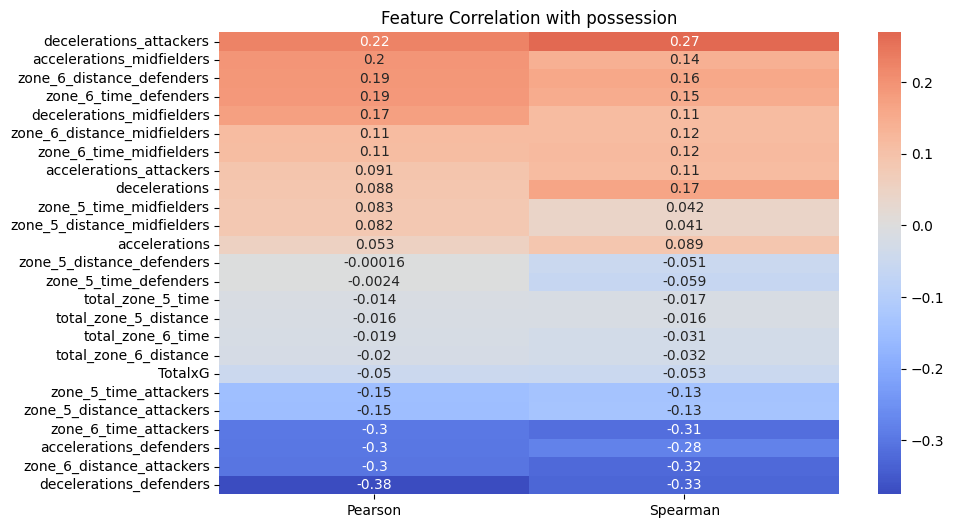

In [7]:
Z = full_games_dataset.drop(columns=['possession'])
T = full_games_dataset['possession']
pearson_corr = Z.corrwith(T)
spearman_corr = Z.corrwith(T, method='spearman')
plt.figure(figsize=(10, 6))

# Combine Pearson and Spearman into a DataFrame and plot heatmap
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})
sorted_features_corr = corr_df.reindex(corr_df['Pearson'].sort_values(ascending=False).index)
sns.heatmap(sorted_features_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation with possession")
plt.show()

In [8]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split

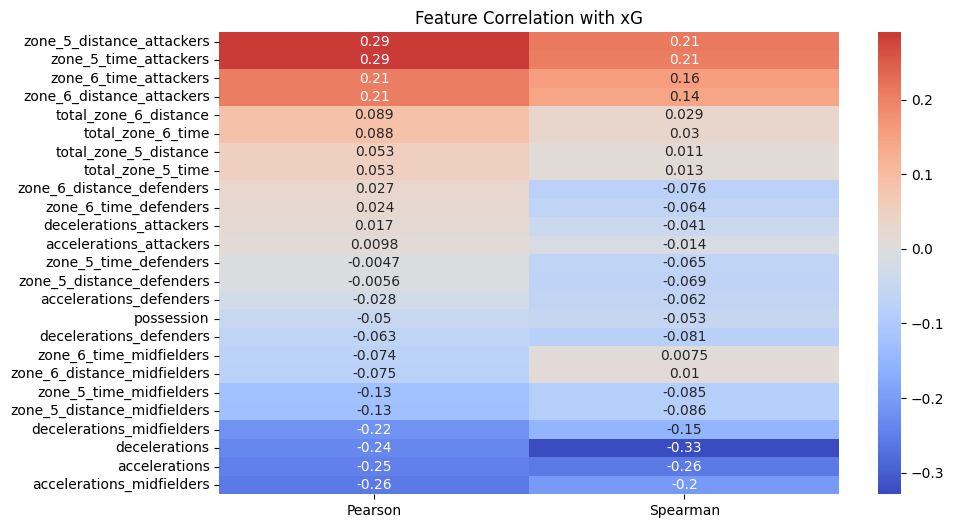

In [9]:
# Pearson correlation
pearson_corr = X.corrwith(y)
spearman_corr = X.corrwith(y, method='spearman')
plt.figure(figsize=(10, 6))

# Combine Pearson and Spearman into a DataFrame and plot heatmap
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr
})
sorted_features_corr = corr_df.reindex(corr_df['Pearson'].sort_values(ascending=False).index)
sns.heatmap(sorted_features_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Correlation with xG")
plt.show()

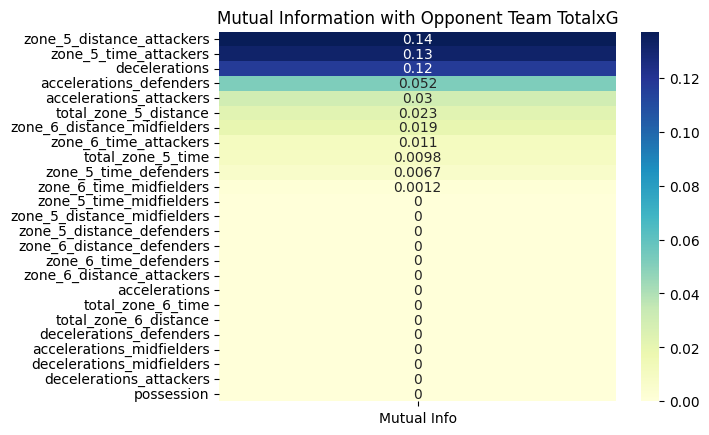

In [10]:
# Mutual Information (non-linear dependency)
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
sorted_mi = mi_series.sort_values(ascending=False)
sns.heatmap(sorted_mi.to_frame(name='Mutual Info'), annot=True, cmap="YlGnBu")
plt.title("Mutual Information with Opponent Team TotalxG")
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [39]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Keep only top 10 features most correlated with y
selector = SelectKBest(score_func=f_regression, k=12)
model = LinearRegression()

pipe = make_pipeline(selector, model)
pipe.fit(X_train, y_train)


Pipeline(steps=[('selectkbest',
                 SelectKBest(k=12,
                             score_func=<function f_regression at 0x79b25c850e00>)),
                ('linearregression', LinearRegression())])

In [42]:
pred = pipe.predict(X_test)
errors = y_test - pred

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
mad = mean_absolute_error(y_test, pred)
var_error = np.var(errors)

print("TEST")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAD: {mad:.3f}")
print(f"Variance of Error: {var_error:.3f}")

# ---- Optional: view selected features ----
selected_features = model.coef_
print("\nSelected features:")
print(selected_features.tolist())




TEST
R² Score: 0.401
MSE: 0.448
MAD: 0.498
Variance of Error: 0.396

Selected features:
[-0.03346521660152785, 0.19722175012711674, -0.014007806786744154, 0.11908794375684177, 0.032344734941093106, -0.18833617227464466, 0.004245009428701058, -0.039587298873583664, -0.0009044871492591491, -0.0014101618748860283, -0.0016168726752911339, 0.0029562389612807875]


In [43]:
pred = pipe.predict(X_train)
errors = y_train - pred
r2 = r2_score(y_train, pred)
mse = mean_squared_error(y_train, pred)
mad = mean_absolute_error(y_train, pred)
var_error = np.var(errors)

print("TRAIN")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAD: {mad:.3f}")
print(f"Variance of Error: {var_error:.3f}")

# ---- Optional: view selected features ----
mask = selector.get_support()
selected_features = X.columns[mask]
print("\nSelected features:")
print(selected_features.tolist())

TRAIN
R² Score: 0.257
MSE: 0.494
MAD: 0.592
Variance of Error: 0.494

Selected features:
['zone_5_distance_midfielders', 'zone_5_time_midfielders', 'zone_6_distance_midfielders', 'zone_6_time_midfielders', 'zone_5_distance_attackers', 'zone_5_time_attackers', 'zone_6_distance_attackers', 'zone_6_time_attackers', 'accelerations', 'decelerations', 'accelerations_midfielders', 'decelerations_midfielders']


In [77]:
# Define the models and their parameter grids for Grid Search
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': [0.1, 1.0, 10.0, 100]}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': [100, 1.0, 10.0]}
    },
    'ElasticNet': {
        'model': ElasticNet(),
        'params': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {'max_depth': [5, 10, 15]}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [5, 10, 20], 'max_depth': [3, 5, 10]}
    }
}

results = {}
best_models = {}
for model_name, model_info in models.items():
    print(f"Running Grid Search for {model_name}...")
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    pred = best_model.predict(X_test)
    train_pred = best_model.predict(X_train)
    errors = y_test - pred

    r2 = r2_score(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    train_mse = mean_squared_error(y_train, train_pred)
    mad = mean_absolute_error(y_test, pred)
    train_mad = mean_absolute_error(y_train, train_pred)
    var_error = np.var(errors)

    results[model_name] = {
        'best_params': grid_search.best_params_,
        'test_r2': r2,
        'test_mse': mse,
        'test_mad': mad,
        'train_mse' : train_mse,
        'train_mad' : train_mad,
        'error_variance': var_error
    }

    print(f"Finished Grid Search for {model_name}. "
          f"Test R²: {r2:.4f}, train_MSE: {train_mse: .4f}, MSE: {mse:.4f}, train_MAD: {train_mad: .4f}, MAD: {mad:.4f}, Var(Error): {var_error:.4f}")

Running Grid Search for Linear Regression...
Finished Grid Search for Linear Regression. Test R²: 0.2421, train_MSE:  0.3915, MSE: 0.5667, train_MAD:  0.5154, MAD: 0.5600, Var(Error): 0.4459
Running Grid Search for Ridge...
Finished Grid Search for Ridge. Test R²: 0.3707, train_MSE:  0.5033, MSE: 0.4706, train_MAD:  0.5958, MAD: 0.6242, Var(Error): 0.4490
Running Grid Search for Lasso...
Finished Grid Search for Lasso. Test R²: -0.0209, train_MSE:  0.6654, MSE: 0.7634, train_MAD:  0.6661, MAD: 0.7338, Var(Error): 0.7478
Running Grid Search for ElasticNet...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.061e+00, tolerance: 2.449e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.165e+00, tolerance: 2.363e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.295e+00, tolerance: 2.371e

Finished Grid Search for ElasticNet. Test R²: 0.3235, train_MSE:  0.5806, MSE: 0.5058, train_MAD:  0.6273, MAD: 0.6114, Var(Error): 0.4911
Running Grid Search for Decision Tree...
Finished Grid Search for Decision Tree. Test R²: -0.6638, train_MSE:  0.0480, MSE: 1.2441, train_MAD:  0.1332, MAD: 0.8921, Var(Error): 1.2396
Running Grid Search for Random Forest...
Finished Grid Search for Random Forest. Test R²: 0.3358, train_MSE:  0.4585, MSE: 0.4967, train_MAD:  0.5113, MAD: 0.5872, Var(Error): 0.4895


In [78]:
random_forest_model = best_models['Random Forest']

In [79]:
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
random_forest_model.feature_importances_

array([1.81332375e-02, 4.45233297e-02, 9.57159285e-03, 1.19744954e-01,
       4.80179775e-02, 0.00000000e+00, 5.69192715e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.57905896e-02, 1.23288732e-01,
       5.19228300e-02, 0.00000000e+00, 3.26675109e-02, 2.32337204e-02,
       9.38584663e-02, 2.00411651e-01, 3.35107896e-05, 0.00000000e+00,
       8.92655600e-02, 8.30933574e-03, 0.00000000e+00, 3.02182439e-02,
       2.40894857e-02])

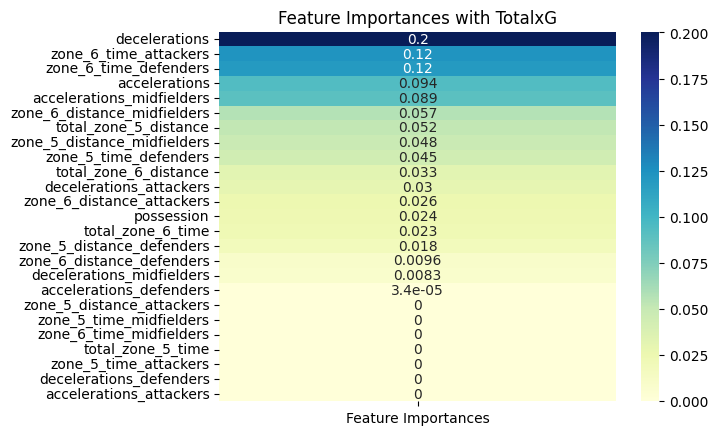

In [81]:
rf_importances = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sorted_importance = rf_importances.sort_values(ascending=False)
sns.heatmap(sorted_importance.to_frame(name='Feature Importances'), annot=True, cmap="YlGnBu")
plt.title("Feature Importances with TotalxG")
plt.show()

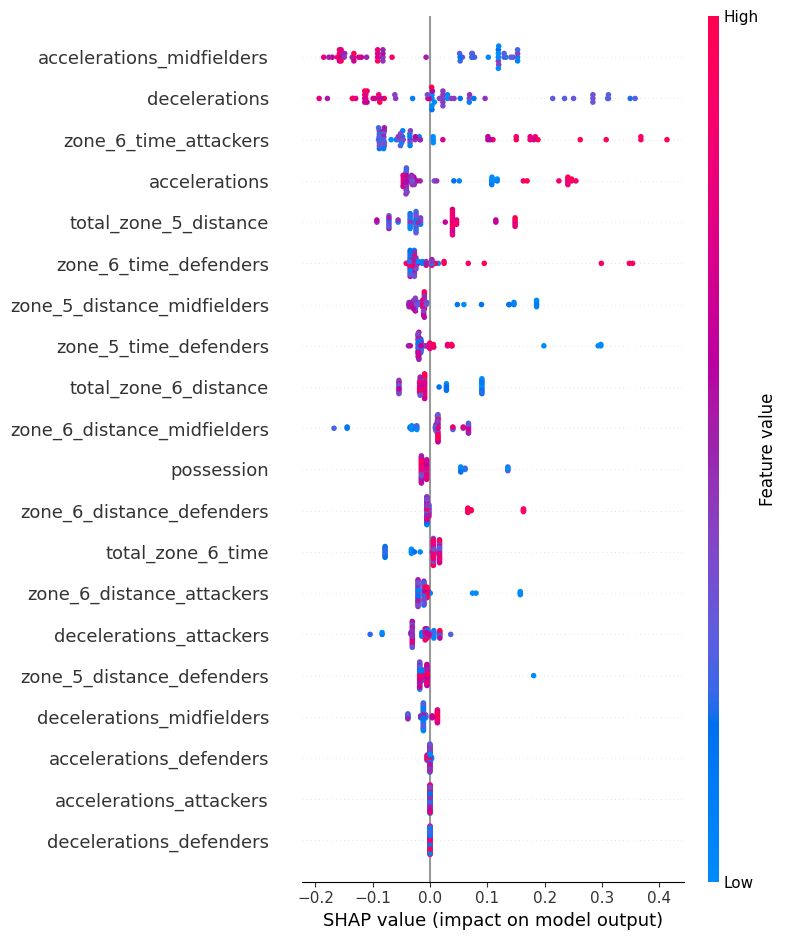

In [82]:
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer(X)  # explain on test set

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X)

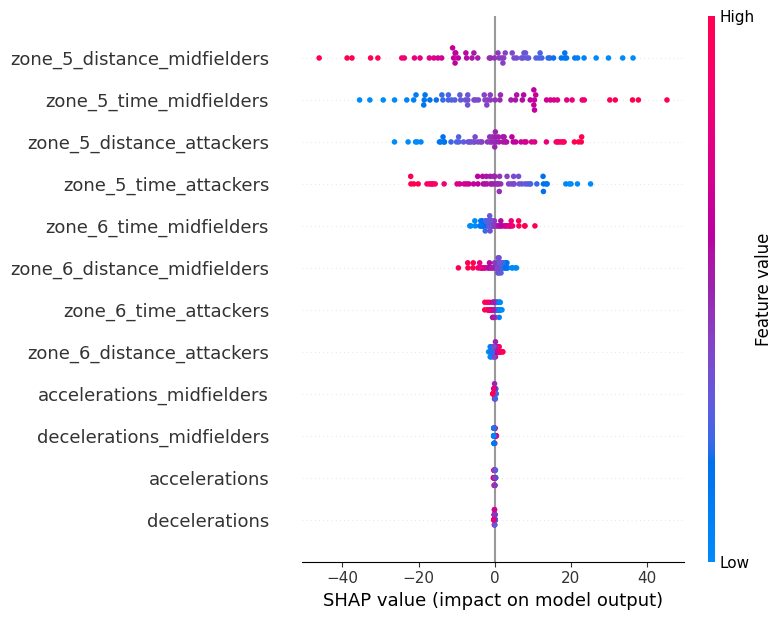

In [65]:
linear_reg_model = pipe.named_steps['linearregression']
selector_step = pipe.named_steps['selectkbest']

selected_feature_mask = selector_step.get_support()
selected_feature_names = X.columns[selected_feature_mask]

X_for_explainer = X[selected_feature_names]

explainer_linear = shap.LinearExplainer(linear_reg_model, X_for_explainer)
shap_values_linear = explainer_linear(X_for_explainer)  # explain on selected features

# Summary plot (global feature importance)
shap.summary_plot(shap_values_linear, X_for_explainer)

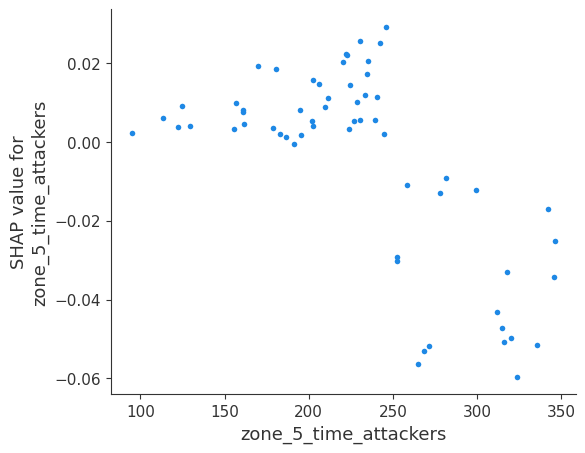

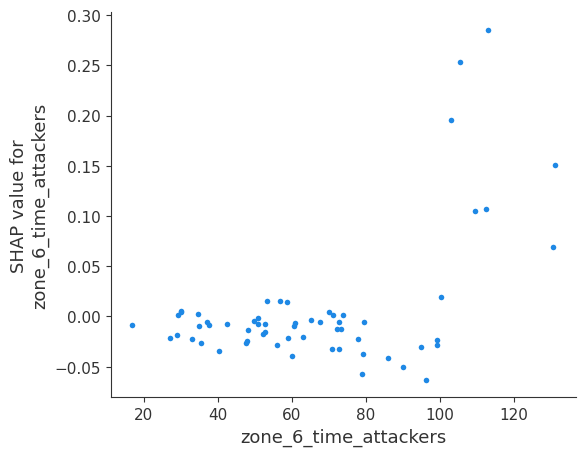

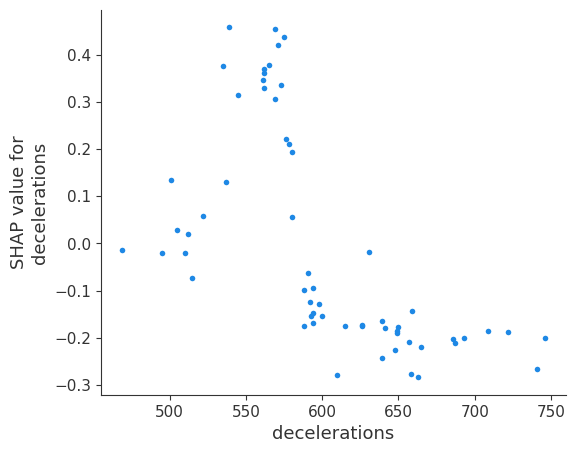

In [51]:
shap.dependence_plot("zone_5_time_attackers", shap_values.values, X,interaction_index=None)
shap.dependence_plot("zone_6_time_attackers", shap_values.values, X,interaction_index=None)
shap.dependence_plot("decelerations", shap_values.values, X,interaction_index=None)

In [83]:
import pandas as pd

results_df = pd.DataFrame(results).T
display(results_df)

best_model_name = results_df['test_r2'].idxmax()
print(f"\nBest performing model on the test set based on R-squared: {best_model_name}")
print("Results for the best model:")
display(results_df.loc[best_model_name])

,best_params,test_r2,test_mse,test_mad,train_mse,train_mad,error_variance
Linear Regression,{},0.242101,0.566733,0.559997,0.391501,0.51542,0.445886
Ridge,{'alpha': 100},0.370699,0.470571,0.624194,0.503268,0.595759,0.448965
Lasso,{'alpha': 100},-0.020895,0.763394,0.73375,0.665369,0.666146,0.747769
ElasticNet,"{'alpha': 10.0, 'l1_ratio': 0.9}",0.323534,0.50584,0.611436,0.580605,0.627286,0.49112
Decision Tree,{'max_depth': 5},-0.66381,1.244145,0.89213,0.048038,0.133171,1.239614
Random Forest,"{'max_depth': 3, 'n_estimators': 5}",0.335757,0.4967,0.587183,0.458511,0.511265,0.489526



Best performing model on the test set based on R-squared: Ridge
Results for the best model:


,Ridge
best_params,{'alpha': 100}
test_r2,0.370699
test_mse,0.470571
test_mad,0.624194
train_mse,0.503268
train_mad,0.595759
error_variance,0.448965
